<a href="https://colab.research.google.com/github/Anjasfedo/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

PyTorch end-to-end workflow

In [36]:
what_were_covering = {1: "data (prepare & load)",
           2: "build model",
           3: "fitting model to data (training)",
           4: "make predict and evaluate model (inference)",
           5: "save & load model",
           6: "put all together"}

In [37]:
import torch
from torch import nn # nn contain all PyTorch building block for neural network
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## Data preparing & Loading

Data can be almost anything on machine learning
- Excel spreadsheet
- Text
- Images
- Videos
- Audio
- DNA

machine learning is game of two part
1. get data into numerical representation
2. build model to learn patern based on that numerical representation

to showcase this, lets create some *known* data from linear regression formula

use linear regression formula to make straight line with known *parameters*



In [38]:
# create known parameter

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

most important concepts in machine learning in general

- training set (course material)
- validation set (practice exam)
- test set (final exam)

Generalization, ability of machine learning model to perform well on data it hasnt seed before

create training and set with the data

In [40]:
# create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [41]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

How to better visualize data

this is where data explorer motto comes in
"Visualize, visualize, visualize!"

In [42]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """
  Plots training data, test data, compares predictions
  """

  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  # plot the predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # show the legend
  plt.legend(prop={"size": 14})

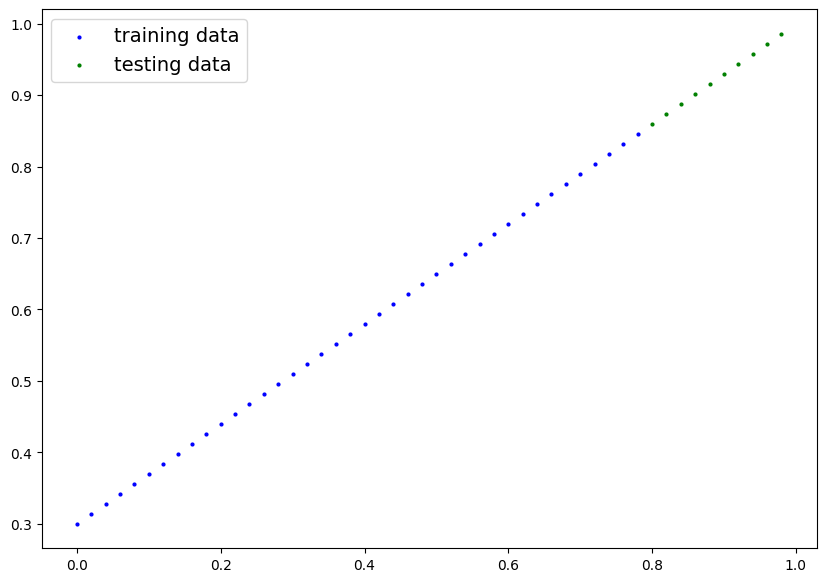

In [43]:
plot_predictions()

## Build Model

first PyTorch model

https://realpython.com/python-classes/

the model does
- start with random values (weight & bias)
- look at training data and adjuct the random values to better represent (or get closer to) to ideal values (the weight & bias values we used to create the data)

Through two main algorithms:
1. gradient decent
2. backpropogation

In [137]:
# create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # model parameter
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  # forward mtehod to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias # linear regression formula

### PyTorch model building essentials

* torch.nn - contain all buildings for computational graph (such as neural network)
* torch.nn.parameter - what parameters the model try and learn, ofter a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all neural network module, if sublass it, shoud overwrite forward()
* torch.optim - optimizer in PyTorch live, will help gradient decent
* def forward() - all nn.Module sublacces require to overwrite forward(), to define what heppen in the forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

1. get data (torchvision.transform, torch.utils.data.Dataset, torch.utils.data.DataLoader)
2. build model (loss function (torch.nn, torch.nn.Module, torchvision.models) optimizer (torch.optim))
3. evaluate model (torchmetrics)
4. improve through experiment (torch.utils.tensorboard)


### Check content of PyTorch model

model has created, let see the inside

to check model parameters use .parameters()

In [138]:
# create random seed
torch.manual_seed(42)

# create instance of model
model_0 = LinearRegressionModel()

# check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [46]:
# list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [47]:
weight, bias

(0.7, 0.3)

### Make prediction with `toech.inference_mode()`

to check the model predictive power, lets see how well it predict `y_test` based on `X_test`

when data pass through model, its going run through forward()


In [48]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [49]:
y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]], grad_fn=<AddBackward0>)

In [50]:
# Make prediction with model
with torch.inference_mode(): # context manager of do prediction, turn off gradient tracking. make it faster
  y_preds = model_0(X_test)

# also same with torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [51]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

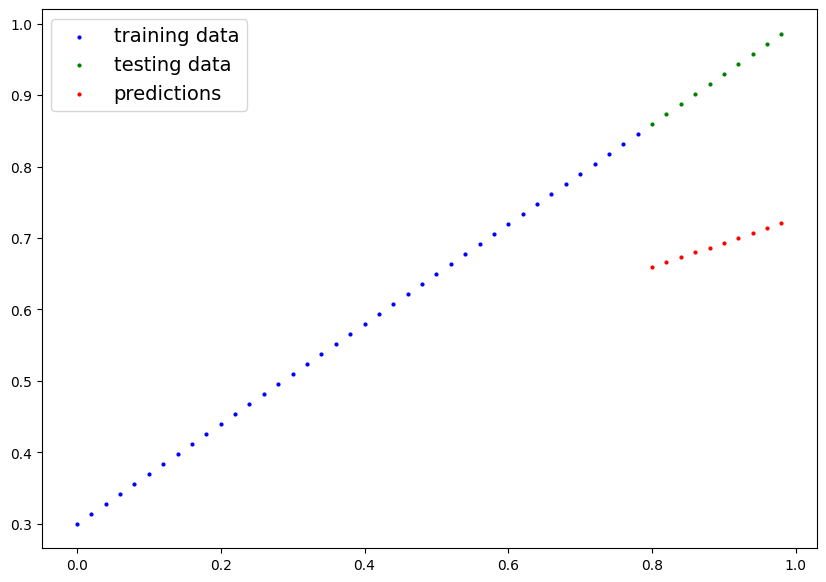

In [52]:
plot_predictions(predictions=y_preds)

## Train model

the main idea of training is to make model move from *unknown* parameter to *known* parameter

or other words from poor representation of the data to a better representation of the data

pne way to measure how poor them model prediction, is to use a loss function

* loss function also be called cost function or criterion on dirrefent areas

things we need to train:

- **loss function**: function to measure how wrong model to ideal prediction
- **optimizer**: take into account the loss of a model and adjust the model parameters (weight & bias) to improve the loss function

 inside optimizer often have to set two parameters:
  - params - model parameter that need to optimize
  - lr - hyperparameter that define how big/small the optimizer changes the parameter with each step

specificaly for PyTorch, we need:
* training loop
* testing loop

In [53]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [139]:
# model parameters, value that model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [140]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possible most important hyperparameter can be set, changes the parameters each iterator

Q = how to choose loss function adn optimizer
A = problem specific, but with experience you will get an idea of how works and what ddoesnt with particular problem set

for example, for regression problem, a loss function `nn.L1Loss` and an optimizer `torch.optim.SGD` will suffice

but for classification problem like photo of two label such dog or cat, use loss function of `nn.BCELoss` (Binary cross entropy loss)

### Building a training loop (and testing loop) in PyTorch

for training loop, we need:
0. loop through the data
1. forward pass (involves data moving through model `forward()` functions) to make prediction of data - also called forward propogation
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backward through the network to calculate the gradients of each of the parameters of model with respect to the loss (**backpropogation**)
5. optimizer step - use the optimizet to adjust the model parameters to try and improve the loss (**gradient descent**)


In [56]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [141]:
torch.manual_seed(42)

# an epochs is one loop through the data (this is hyperparameter, because we set it itself)
epochs = 100

### Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss, different of model prediction and true values
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. optimizer zero grad, zero the gradients of the optimizer (accumulate by default)
  optimizer.zero_grad()

  # 4. perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step() # default how the optimizer changes will accumulate through the loop, so we have zero them above in step 3 for the next iteration of the loop

  # testing mode
  model_0.eval() # turns off gradient tracking, that not needed for eval/test
  with torch.inference_mode(): # turns of gradient tracing & more things behind things behind the scenes
    # 1. do forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    # Print what heppen
    print(f"Epoch: {epoch} | Loss: {loss}: Test loss: {test_loss}")

    # print model state_dict
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.08169572055339813: Test loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | Loss: 0.06808149069547653: Test loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | Loss: 0.06258393079042435: Test loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | Loss: 0.05879194289445877: Test loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | Loss: 0.05530194193124771: Test loss: 0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | Loss: 0.051822252571582794: Test loss: 0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | Loss: 0.04838593676686287: Test loss: 0.11223447322845459
OrderedDict([('weights', tensor([0.4610])), ('bias', tensor([0.4004]))])
E

In [60]:
weight, bias

(0.7, 0.3)

In [142]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

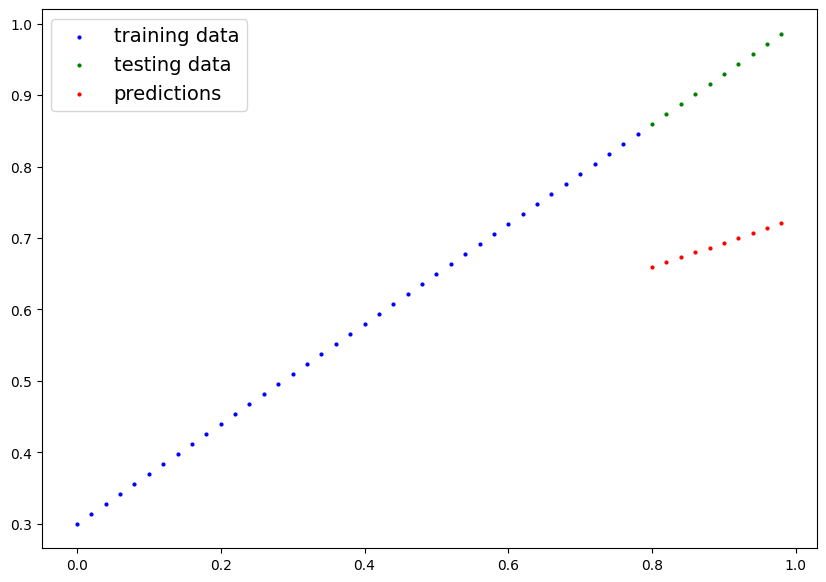

In [143]:
plot_predictions(predictions=y_preds)

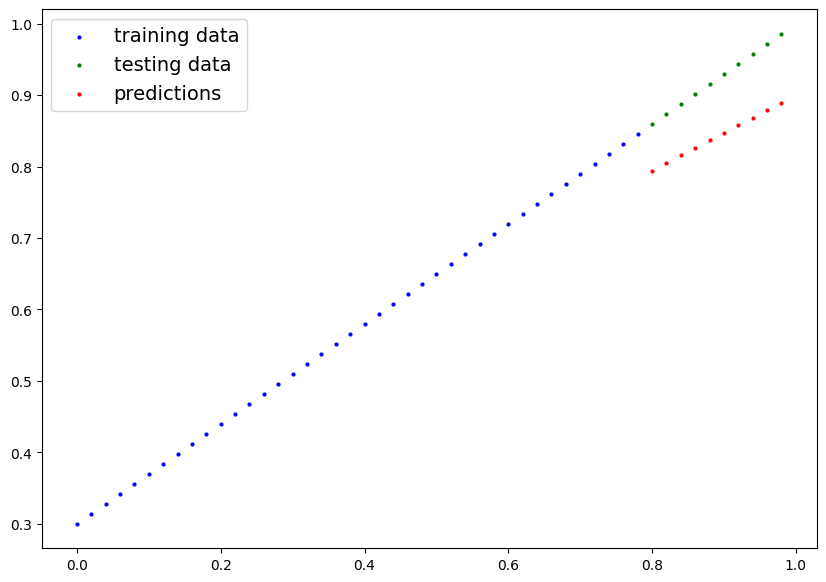

In [144]:
plot_predictions(predictions=y_preds_new)

PyTorch optimization loop song
its train time

do the forward loss

calculate the loss

optimizer zero grad

losssss backward


optimizer step step step


lets test now

with torch no grad

do the forward pass

calculate the loss

watch it go down down down

In [68]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3515])), ('bias', tensor([0.4049]))])